In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
data=pd.read_csv(r"C:\Users\shukl\Downloads\Flight_Data.csv",encoding='unicode_escape',dtype={11: str, 12: str})

In [129]:
data.head()

,S_No,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,01-01-2018
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,02-01-2018
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,03-01-2018
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,04-01-2018
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,05-01-2018


In [130]:
df=data.copy()

In [131]:
df.shape

(301206, 13)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301206 entries, 0 to 301205
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   S_No              301206 non-null  int64  
 1   airline           300754 non-null  object 
 2   flight            301206 non-null  object 
 3   source_city       301206 non-null  object 
 4   departure_time    301206 non-null  object 
 5   stops             301206 non-null  object 
 6   arrival_time      301206 non-null  object 
 7   destination_city  301206 non-null  object 
 8   class             301006 non-null  object 
 9   duration          300956 non-null  float64
 10  days_left         301206 non-null  int64  
 11  price             301106 non-null  object 
 12  date              358 non-null     object 
dtypes: float64(1), int64(2), object(10)
memory usage: 29.9+ MB


In [133]:
null_values = df.isna().sum()
null_values

S_No                     0
airline                452
flight                   0
source_city              0
departure_time           0
stops                    0
arrival_time             0
destination_city         0
class                  200
duration               250
days_left                0
price                  100
date                300848
dtype: int64

In [134]:
null_values_percentage = (df.isna().sum()/(df.shape[0]))*100
null_values_percentage

S_No                 0.000000
airline              0.150063
flight               0.000000
source_city          0.000000
departure_time       0.000000
stops                0.000000
arrival_time         0.000000
destination_city     0.000000
class                0.066400
duration             0.083000
days_left            0.000000
price                0.033200
date                99.881144
dtype: float64

In [135]:
pd.concat([null_values, null_values_percentage], axis =1)

,0,1
S_No,0,0.000000
airline,452,0.150063
flight,0,0.000000
source_city,0,0.000000
departure_time,0,0.000000
stops,0,0.000000
arrival_time,0,0.000000
destination_city,0,0.000000
class,200,0.066400
duration,250,0.083000


In [136]:
all_columns = df.columns
all_columns


Index(['S_No', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price', 'date'],
      dtype='object')

In [137]:
numeric_columns = df.select_dtypes(include = np.number).columns
numeric_columns

Index(['S_No', 'duration', 'days_left'], dtype='object')

In [138]:
non_numeric_columns = df.select_dtypes(include = object).columns
non_numeric_columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'price', 'date'],
      dtype='object')

In [139]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
301201    False
301202    False
301203    False
301204    False
301205    False
Length: 301206, dtype: bool

In [140]:
df = df[~df.duplicated()]
df[df.duplicated()]

,S_No,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date


# Data Cleaning

In [141]:
df.drop(['date'], axis=1, inplace=True)
df.head(2)

,S_No,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


In [142]:
df['price'] = pd.to_numeric(df['price'], errors = 'coerce')

In [143]:
df.dropna(subset = ['airline', 'class', 'duration', 'price'], inplace = True)

In [144]:
airline_mode = df['airline'].mode()[0]

In [145]:
class_mode = df['class'].mode()[0]

In [146]:
duration_mean = df['duration'].mean()

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300204 entries, 0 to 301205
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   S_No              300204 non-null  int64  
 1   airline           300204 non-null  object 
 2   flight            300204 non-null  object 
 3   source_city       300204 non-null  object 
 4   departure_time    300204 non-null  object 
 5   stops             300204 non-null  object 
 6   arrival_time      300204 non-null  object 
 7   destination_city  300204 non-null  object 
 8   class             300204 non-null  object 
 9   duration          300204 non-null  float64
 10  days_left         300204 non-null  int64  
 11  price             300204 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 29.8+ MB


In [148]:
df.isna().sum()

S_No                0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

## Outlier Detection & Removal

In [149]:
df.describe()

,S_No,duration,days_left,price
count,3.002040e+05,300204.000000,300204.000000,3.002040e+05
mean,1.502714e+05,12.226546,26.000503,2.101474e+04
std,8.792658e+04,7.297721,13.563767,2.541873e+04
min,0.000000e+00,0.830000,1.000000,1.105000e+03
25%,7.505075e+04,6.830000,15.000000,4.783000e+03
50%,1.501015e+05,11.250000,26.000000,7.425000e+03
75%,2.251522e+05,16.170000,38.000000,4.252100e+04
max,1.300222e+06,622.250000,49.000000,2.512780e+06


Text(0.5, 1.0, "Box plot for 'price'")

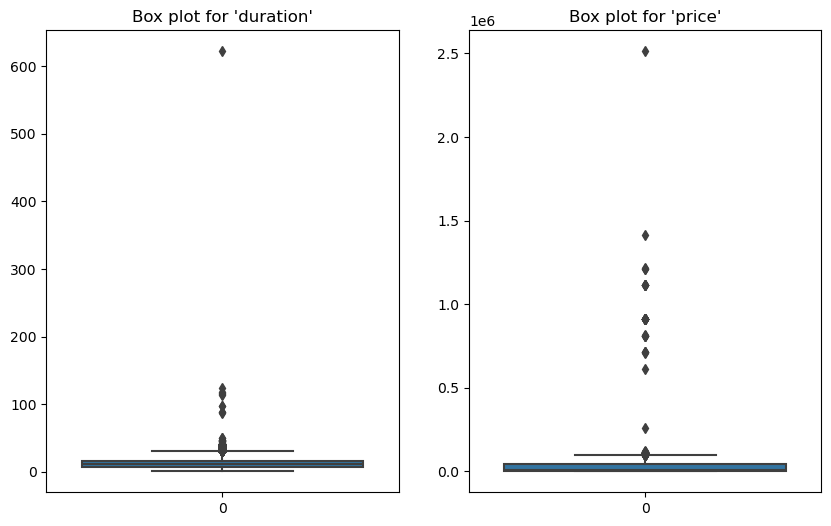

In [150]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.boxplot(data=df['duration'], ax=ax[0])
ax[0].set_title("Box plot for 'duration'")

sns.boxplot(data=df['price'], ax=ax[1])
ax[1].set_title("Box plot for 'price'")


In [151]:
Q1_duration = np.quantile(df['duration'], 0.25)
Q3_duration = np.quantile(df['duration'], 0.75)
IQR_duration = Q3_duration - Q1_duration
#IQR_duration
lower_limit_duration = Q1_duration - 1.5*IQR_duration
upper_limit_duration = Q3_duration + 1.5*IQR_duration


In [152]:
df = df[(df['duration'] > lower_limit_duration) & (df['duration'] < upper_limit_duration)]

In [153]:
Q1_price = np.quantile(df['price'], 0.25)
Q3_price = np.quantile(df['price'], 0.75)
IQR_price = Q3_price - Q1_price
#IQR_price
lower_limit_price = Q1_price - 1.5*IQR_price
upper_limit_price = Q3_price + 1.5*IQR_price

print(lower_limit_price)
print(upper_limit_price)

-51884.0
99164.0


In [154]:
df = df[(df['price'] > lower_limit_price) & (df['price'] < upper_limit_price)]

In [155]:
df.describe()

,S_No,duration,days_left,price
count,297921.000000,297921.000000,297921.000000,297921.000000
mean,150029.465217,12.071680,26.039299,20883.203916
std,86778.318243,6.994053,13.549680,22672.527599
min,0.000000,0.830000,1.000000,1105.000000
25%,74774.000000,6.750000,15.000000,4757.000000
50%,150035.000000,11.170000,26.000000,7424.000000
75%,225342.000000,16.000000,38.000000,42521.000000
max,300152.000000,30.170000,49.000000,99129.000000


In [156]:
df.to_csv(r"C:\Users\shukl\Downloads\Flight_clean.csv",index=False)